In [2]:
import requests #attp 요청을 수행하는 라이브러리 
import matplotlib.pyplot as plt
import time

# 1. 상위 100개 코인 정보 가져오기
def get_top_100_coins():
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "order": "market_cap_desc",
        "per_page": 100,
        "page": 1,
        "sparkline": False
    }
    response = requests.get(url, params=params)
    return response.json()

# 2. 코인의 시가총액 추이 가져오기 (최근 7일 기준, 하루 단위)
def get_market_chart(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": 365,
        "interval": "daily"
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()["market_caps"]
    else:
        return []

# 3. 시각화 함수
def plot_market_caps(coin_data):
    plt.figure(figsize=(16, 10))

    for coin_name, market_caps in coin_data.items():
        if not market_caps:
            continue
        timestamps = [cap[0] for cap in market_caps]
        values = [cap[1] / 1e9 for cap in market_caps]  # 억 단위로 변환 (Billion USD)
        label = coin_name if len(values) > 0 else ""
        plt.plot(timestamps, values, label=label)

    plt.title("Top 100 Alt Coins - Market Cap Trend (Last 365 Days)")
    plt.xlabel("Timestamp")
    plt.ylabel("Market Cap (Billion USD)")
    plt.xticks(rotation=45)
    plt.legend(fontsize="small", loc="upper left", ncol=2)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

🚀 Fetching top 100 coins...
📈 Fetching data for Tether (1/100)
📈 Fetching data for XRP (2/100)
📈 Fetching data for BNB (3/100)
📈 Fetching data for Solana (4/100)
📈 Fetching data for USDC (5/100)
📈 Fetching data for Dogecoin (6/100)
📈 Fetching data for Cardano (7/100)
📈 Fetching data for TRON (8/100)
📈 Fetching data for Lido Staked Ether (9/100)
📈 Fetching data for Wrapped Bitcoin (10/100)
📈 Fetching data for Sui (11/100)


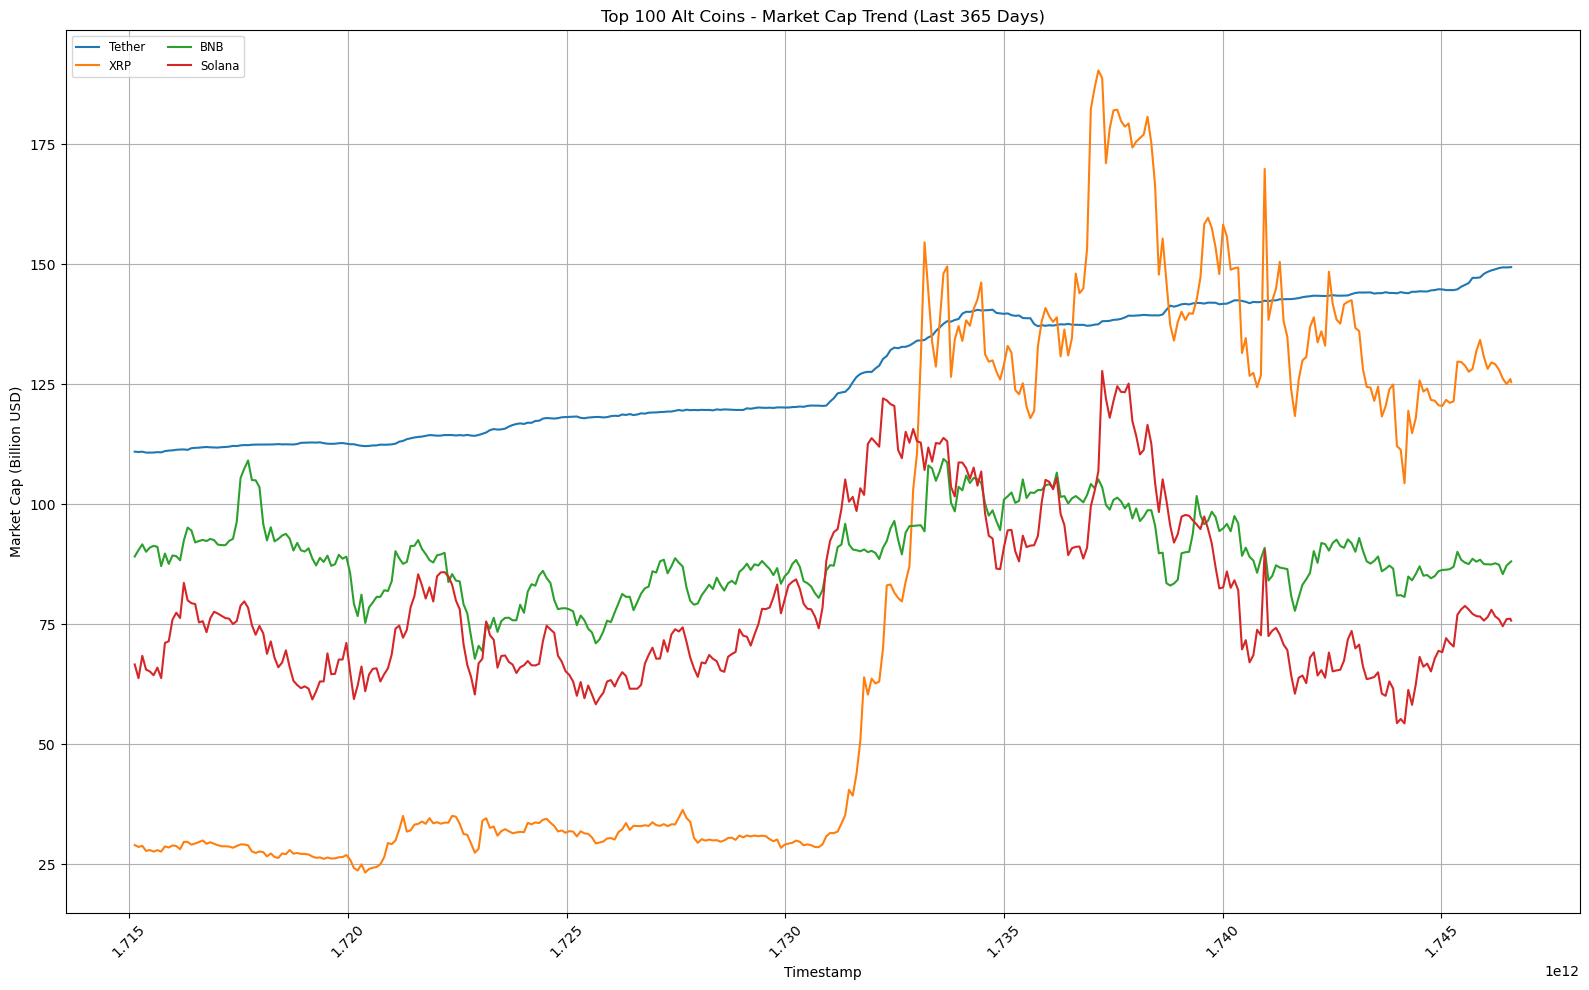

In [3]:
print("🚀 Fetching top 100 coins...")
coins = get_top_100_coins()
coins = coins[2:] # 비트코인, 이더리움 제외
coin_market_data = {}

for i, coin in enumerate(coins):
    coin_id = coin["id"]
    coin_name = coin["name"]
    print(f"📈 Fetching data for {coin_name} ({i+1}/100)")
    market_caps = get_market_chart(coin_id)
    coin_market_data[coin_name] = market_caps
    time.sleep(1.2)  # CoinGecko 무료 API 요청 제한 우회

    if i >= 10:  # 너무 많으면 오래 걸리니까 예제로 10개만!
        break

plot_market_caps(coin_market_data)